In [45]:
import random
import numpy as np
import pandas as pd
from sys import maxsize
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(linewidth=500, suppress=True)

### Data

In [3]:
distance_df = pd.read_excel("distance.xlsx", header=0, usecols = "B : P", skiprows = 0)

In [ ]:
distance_df

In [5]:
distance_df.shape

(15, 15)

In [6]:
distance_array = distance_df.to_numpy()

In [ ]:
distance_array

### Random Walk

In [46]:
start = 0
def random_path(graph):
  N = 14
  path = []
  path.append(0)
  cities_No = list(range(len(graph)))
  # print(len(cities_No)) #14

  for i in range(N):
    randval = random.randint(1, len(cities_No)-1)
    randomCity = cities_No[randval]
    path.append(randomCity)
    cities_No.remove(randomCity)

  return path

In [10]:
def path_distance(graph, path):
  N = 15
  distance = 0
  for i in range(N):
    distance += graph[path[i-1]][path[i]]
  
  return distance

In [64]:
def Random_walk():
  iterations = 100
  min_dis = maxsize
  # PLOT: define x_list, y_list
  x_list = []
  y_list = []
  for i in range(iterations):
    path = random_path(distance_array)  
    dis = path_distance(distance_array, path)
    if(dis < min_dis):  min_dis = dis

    # PLOT: append i to x_list/ min_dis to y_list
    x_list.append(i)
    y_list.append(min_dis)

  return min_dis, x_list, y_list

In [151]:
res_dis, RA_x, RA_y = Random_walk()
print("Random Walk optimal: ", res_dis)
print("RA_x: ", RA_x)
print("RA_y: ", RA_y)

Random Walk optimal:  2198.0
RA_x:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
RA_y:  [2815.0, 2815.0, 2815.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2385.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.0, 2198.

### Hill Climbing

In [157]:
def findNeighbors(path):
    N = 15
    neighbors = []

    for i in range(1, N): # skip 0
        for j in range(i + 1, N):
            neighbor = path.copy()
            neighbor[i], neighbor[j] = path[j], path[i] # Move: swap
            neighbors.append(neighbor)
    
    return neighbors

In [158]:
def getBestNeighbor(graph, neighbors):
  # initialize best distance to MAX
  bestDistance = maxsize
  # initialize best neighbor with 0'th neighbor
  bestNeighbor = neighbors[0]

  for neighbor in neighbors:
      currentPathDistance = path_distance(graph, neighbor)
      if currentPathDistance < bestDistance:
          bestNeighbor = neighbor
          bestDistance = currentPathDistance

  return bestNeighbor, bestDistance

In [159]:
def hillclimbing(graph):
  currentPath = random_path(graph)
  currentDistance = path_distance(graph, currentPath)
  neighbors = findNeighbors(currentPath)
  bestNeighbor, bestNeighborDistance = getBestNeighbor(graph, neighbors)

  while bestNeighborDistance < currentDistance:
      currentPath = bestNeighbor
      currentDistance = bestNeighborDistance
      neighbors = findNeighbors(currentPath)
      bestNeighbor, bestNeighborDistance = getBestNeighbor(graph, neighbors)

  return currentPath, currentDistance

In [160]:
def Hill():
  iterations = 100
  best_distance = maxsize

  # PLOT: define x_list, y_list
  x_list = []
  y_list = []

  for i in range(iterations):
    hill_path, hill_dis = hillclimbing(distance_array)
    if hill_dis < best_distance:
      best_distance = hill_dis

    # PLOT: append i to x_list/ best_distance to y_list
    x_list.append(i)
    y_list.append(best_distance)

  return hill_path, best_distance, x_list, y_list

In [161]:
res_path, res_dis, Hill_x, Hill_y = Hill()
print("Hill-climbing path: ", res_path)
print("Hill-climbing optimal: ", res_dis, "km")
print("Hill_x: ", Hill_x)
print("Hill_y: ", Hill_y)

Hill-climbing path:  [0, 13, 8, 5, 14, 11, 10, 2, 7, 3, 4, 9, 6, 12, 1]
Hill-climbing optimal:  1332.0 km
Hill_x:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Hill_y:  [1859.0, 1496.0, 1366.0, 1366.0, 1366.0, 1366.0, 1366.0, 1366.0, 1366.0, 1366.0, 1357.0, 1357.0, 1357.0, 1357.0, 1357.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1348.0, 1332.0, 1332.0, 1332.0, 1332.0, 1332.0, 1332.0, 1332.0, 1332.0, 1332.0, 1332.0, 1332.0, 1332.0, 1332

### Tabu Search

In [18]:
from itertools import combinations

In [19]:
def getTabuList(currentPath):
        '''
        Returns a dict of tabu attributes(pair of jobs that are swapped) as keys and [visit_idx, distance]
        Only record the pair to be swapped, "not really" swapped.
        '''
        dict = {}
        for swap in combinations(currentPath, 2):
          if swap[0] != 0 and swap[1] != 0:
            dict[swap] = {"visit_idx": 0, "distance": 0}
        return dict

In [21]:
def Swap(currentPath, pair):
  swapped_path = currentPath.copy()
  idx_i = swapped_path.index(pair[0])
  idx_j = swapped_path.index(pair[1])
  swapped_path[idx_i], swapped_path[idx_j] = swapped_path[idx_j], swapped_path[idx_i]
  return swapped_path

In [79]:
def Tabu(graph):
  iterations = 100
  tabu_tenure = 10
  tabu_list = [] # record the swap-pair in tabu list

  # initialize the best point
  bestPath = random_path(distance_array)
  bestDistance = path_distance(distance_array, bestPath)
  # initialize the starting point
  currentPath = random_path(distance_array) 
  currentDistance = path_distance(distance_array, currentPath)

  # PLOT: define x_list, y_list
  x_list = []
  y_list = []
  
  iter = 0
  iter_ = 1
  while iter < iterations:
    # Set tabu list
    tabu_list = getTabuList(currentPath)
    for pair in tabu_list:
      runPath = Swap(currentPath, pair)
      runDistance = path_distance(distance_array, runPath) # ptest.y
      tabu_list[pair]["distance"] = runDistance

    while True:
      # Check acceptable cases
      tabu_best_path = min(tabu_list, key =lambda x: tabu_list[x]["distance"]) 
      path_dis = tabu_list[tabu_best_path]["distance"] # the minimum distance in all the neighbors.
      visit_idx = tabu_list[tabu_best_path]["visit_idx"]

      if visit_idx < iter_:
        # Start to move
        currentPath = Swap(currentPath, tabu_best_path) 
        currentDistance = path_distance(distance_array, currentPath)
        
        if path_dis < bestDistance:
          bestPath = currentPath
          bestDistance = currentDistance
        
        tabu_list[tabu_best_path]["visit_idx"] = tabu_tenure + iter_
        iter += 1
        iter_ += 1
        
        break

      # Update tabu list (already in tabu list)
      else:
        if path_dis < bestDistance:
          # start to move
          currentPath = Swap(currentPath, tabu_best_path) 
          currentDistance = path_distance(currentPath)
          # print("cur Path: ",currentPath)
          bestPath = currentPath
          bestDistance = currentDistance

          iter_ += 1
          
          break
        else:
          tabu_list[tabu_best_path]["distance"] = maxsize
          continue

    # PLOT: append i to x_list/ bestDistance to y_list
    x_list.append(iter)
    y_list.append(bestDistance)

  return bestPath, bestDistance, x_list, y_list

In [77]:
res_path, res_dis, Tabu_x, Tabu_y = Tabu(distance_array)
print("Tabu Search path: ", res_path)
print("Tabu Search optimal: ", res_dis, "km")
print("Tabu_x: ", Tabu_x)
print("Tabu_y: ", Tabu_y)

Tabu Search path:  [0, 9, 4, 10, 2, 7, 3, 12, 1, 6, 13, 8, 5, 11, 14]
Tabu Search optimal:  1707.0 km
Tabu_x:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Tabu_y:  [2427.0, 2096.0, 1942.0, 1836.0, 1791.0, 1775.0, 1766.0, 1740.0, 1729.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0, 1707.0

### Simulated Annealing

In [101]:
def getTemp(t, temp, iterations):
  res = (1 - t/(iterations))*temp
  return res

In [162]:
def SA(graph):
  # Parameters
  t_initial = 1000
  iterations = 100

  pcur_x = random_path(distance_array)
  pcur_y = path_distance(graph, pcur_x)
  pb_x, pb_y = pcur_x, pcur_y

  # PLOT: define x_list, y_list
  x_list = []
  y_list = []

  t = 0
  while t < iterations:
        pcurx_neighbors = findNeighbors(pcur_x)
        # print("pcurx_neighbors: ", pcurx_neighbors) # DEBUG
        neighbor_idx = random.randint(0,len(pcurx_neighbors)-1)
        # print("neighbor_idx: ", neighbor_idx) # DEBUG
        pnew_x = pcurx_neighbors[neighbor_idx]
        pnew_y = path_distance(graph, pnew_x)
        dE = pnew_y - pcur_y
        # print("dE: ", dE) # DEBUG: inf

        if dE <= 0:
            pcur_x, pcur_y = pnew_x, pnew_y  
            if pcur_y < pb_y:
                pb_x, pb_y = pcur_x, pcur_y
        else:
            T = getTemp(t, t_initial, iterations)
            t_initial = T
            if np.random.random(1) < np.exp(-dE/T):
                pcur_x, pcur_y = pnew_x, pnew_y 
        
        t += 1

        # PLOT: append t to x_list/ pb_y to y_list
        x_list.append(t)
        y_list.append(pb_y)

  return pb_x, pb_y, x_list, y_list


In [163]:
res_x, res_y, SA_x, SA_y = SA(distance_array)
print("Simulated Annealing path: ", res_x)
print("Simulated Annealing optimal: ", res_y, "km")
print("SA_x: ", SA_x)
print("SA_y: ", SA_y)

Simulated Annealing path:  [0, 6, 9, 12, 1, 13, 3, 5, 8, 14, 11, 2, 7, 10, 4]
Simulated Annealing optimal:  1877.0 km
SA_x:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
SA_y:  [2440.0, 2440.0, 2440.0, 2440.0, 2440.0, 2440.0, 2440.0, 2440.0, 2440.0, 2440.0, 2440.0, 2440.0, 2433.0, 2374.0, 2374.0, 2374.0, 2374.0, 2374.0, 2374.0, 2326.0, 2114.0, 2114.0, 2114.0, 2114.0, 2114.0, 2114.0, 2114.0, 2114.0, 2114.0, 2114.0, 2114.0, 2031.0, 1962.0, 1962.0, 1962.0, 1962.0, 1962.0, 1962.0, 1962.0, 1962.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 1922.0, 19

### Ant Colony

In [28]:
from numpy.random import choice as np_choice

In [29]:
def pick_move(pheromone, dist, visited, alpha=1, beta=1):
        all_inds = range(len(distance_array))
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** alpha * ((1.0/dist) ** beta)
        norm_row = row / row.sum()
        move = np_choice(all_inds, 1, p=norm_row)[0]
        return move

In [30]:
def genPath(num_of_ants, pheromone):
  path_list = []
  for i in range(num_of_ants):
      # path = gen_path(0)
      path = []

      visited = set()
      visited.add(0) # start from 0
      prev = 0
      for i in range(len(distance_array) - 1): 
          move = pick_move(pheromone[prev], distance_array[prev], visited)
          path.append((prev, move))
          prev = move
          visited.add(move)
      path.append((prev, start)) # a new path has been created.

      # Calculate the distance of path
      total_dist = 0
      for i in path:
          total_dist += distance_array[i]
      # add paths to the path list
      path_list.append((path, total_dist)) 

  return path_list

In [31]:
def spread_pheronome(pheromone, all_paths, n_best):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                pheromone[move] = pheromone[move] +  (1.0/distance_array[move])

In [87]:
def Ant(graph):
  for i in range(15):
    distance_array[i,i] = np.inf
  
  pheromone = np.ones(distance_array.shape)/len(distance_array)
  iterations = 100
  num_of_ants = 30
  n_best = 3
  decay = 0.9
  all_time_shortest_path = ("placeholder", np.inf)
  shortest_path = []
  
  # PLOT: define x_list, y_list
  x_list = []
  y_list = []

  t = 0
  while t < iterations:
      all_paths = genPath(num_of_ants, pheromone)
      spread_pheronome(pheromone, all_paths, n_best)
      shortest_path = min(all_paths, key=lambda x: x[1])
      
      if shortest_path[1] < all_time_shortest_path[1]:
          all_time_shortest_path = shortest_path 
          t += 1   
          pheromone *= decay 
      else:
          t += 1       
          pheromone *= decay   

      # PLOT: append t to x_list/ all_time_shortest_path[1] to y_list
      x_list.append(t)
      y_list.append(all_time_shortest_path[1]) 

  return all_time_shortest_path[0],  all_time_shortest_path[1], x_list, y_list

In [88]:
res_path, res_dis, Ant_x, Ant_y = Ant(distance_array)

In [89]:
print("Ant Colony path: ", res_path)
print("Ant Colony optimal: ", res_dis, "km")
print("Ant_x: ", Ant_x)
print("Ant_y: ", Ant_y)

Ant Colony path:  [(0, 6), (6, 13), (13, 4), (4, 8), (8, 5), (5, 14), (14, 11), (11, 10), (10, 2), (2, 7), (7, 3), (3, 9), (9, 12), (12, 1), (1, 0)]
Ant Colony optimal:  1347.0 km
Ant_x:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Ant_y:  [2011.0, 1952.0, 1810.0, 1703.0, 1703.0, 1703.0, 1703.0, 1538.0, 1538.0, 1538.0, 1504.0, 1504.0, 1504.0, 1504.0, 1504.0, 1450.0, 1386.0, 1375.0, 1375.0, 1372.0, 1372.0, 1372.0, 1372.0, 1372.0, 1372.0, 1372.0, 1372.0, 1372.0, 1350.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 1347.0, 13

### Plot 

In [44]:
import matplotlib.pyplot as plt

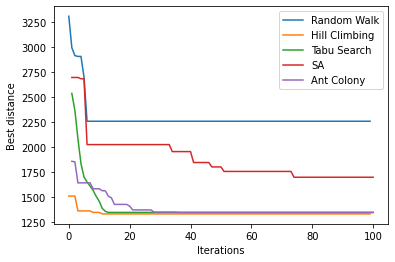

In [152]:
# Random Walk
RA_dis, RA_x, RA_y = Random_walk() 
plt.plot(RA_x, RA_y)

# Hill Climbing
res_path, res_dis, Hill_x, Hill_y = Hill()
plt.plot(Hill_x, Hill_y)

# Tabu Search
res_path, res_dis, Tabu_x, Tabu_y = Tabu(distance_array)
plt.plot(Tabu_x, Tabu_y)

# Simulated Annealing
res_x, res_y, SA_x, SA_y = SA(distance_array)
plt.plot(SA_x, SA_y)

# Ant Colony
res_path, res_dis, Ant_x, Ant_y = Ant(distance_array)
plt.plot(Ant_x, Ant_y)

plt.ylabel("Best distance")
plt.xlabel("Iterations")
plt.legend((["Random Walk", "Hill Climbing", "Tabu Search", "SA", "Ant Colony"]))
plt.show()

### Comments
As the picture above, after 100 iterations, the performance of Hill Climbing has the fastest speed to converge and reach the optimal solution. 

**1.   Hill Climbing**


*   Strength: It's a simple and fast algorithm. 
*   Weakness: However, it doesn't allow walking in a poor direction, which makes it easier to fall into the valley(local optimal) and can't jump out.


**2.   Random Walk**


*   Strength: Unlike Hill Climbing, it doesn't guided by the objective function.
*   Weakness: However, its performance is worse than Hill Climbing.


**3.   Simulated Annealing**

*   Strength: It improves some of the defects of Hill Climbing, allowing it to jump out of the poor locations.
*   Weakness: The setting of the initial temperature, temperature scheduling has a crucial role on the SA result. That is, the choose of these parameters may lead to totally different results.


**4.   Tabu Search**

*   Strength: As we can observe in the picture, Tabu Search has a fast convergence speed. Besides, it avoids repeated visit to the same point.
*   Weakness: It's easy to be stuck in the valley(local optimal).


**5.   Ant Colony**

*   Strength: It can quickly find the optimal solution.
*   Weakness: Time consuming and the update step is too slow.

